# 商业数据分析及Python实现

## 从一个案例说起：为什么需要商业数据分析？

这里节选了我两年的歌单，请根据歌单最大限度地分析我的用户行为。

### 2019年中
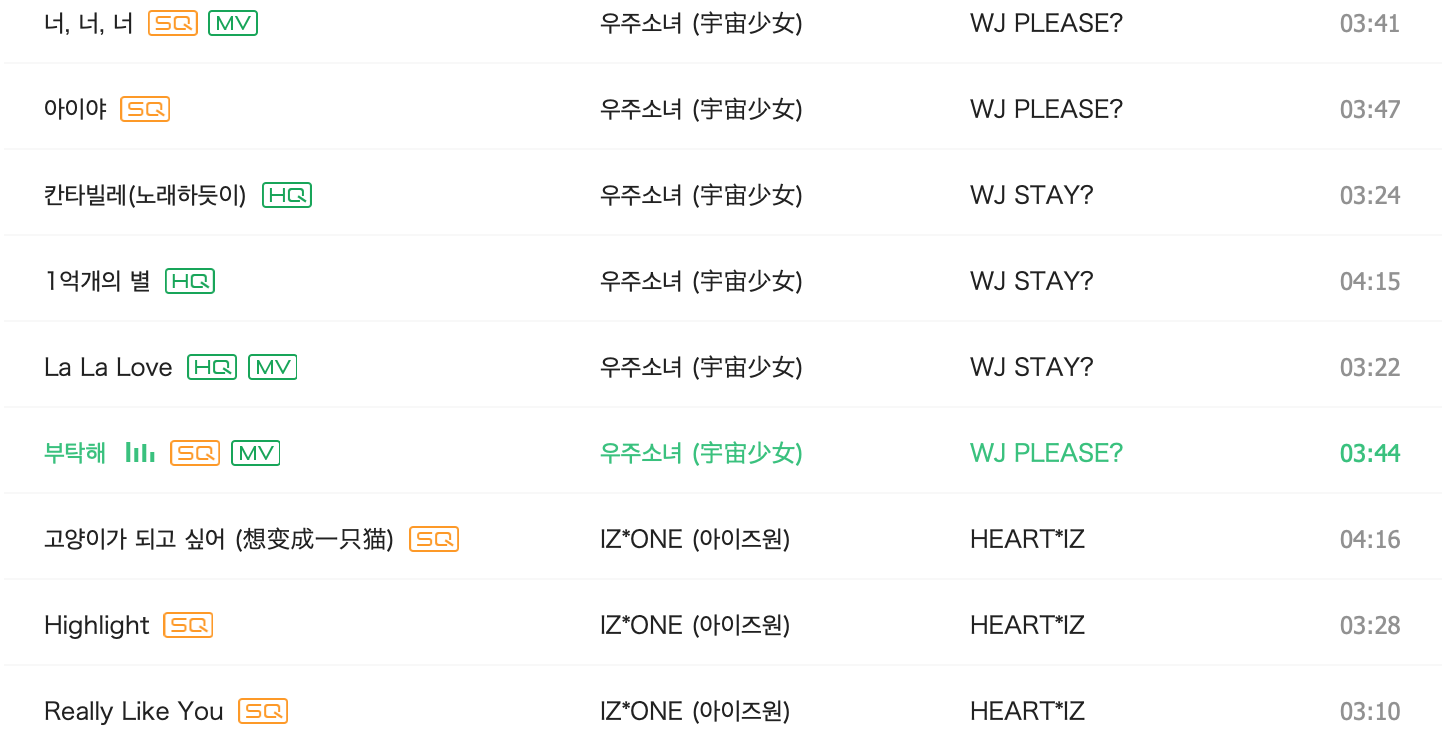

### 2019年初
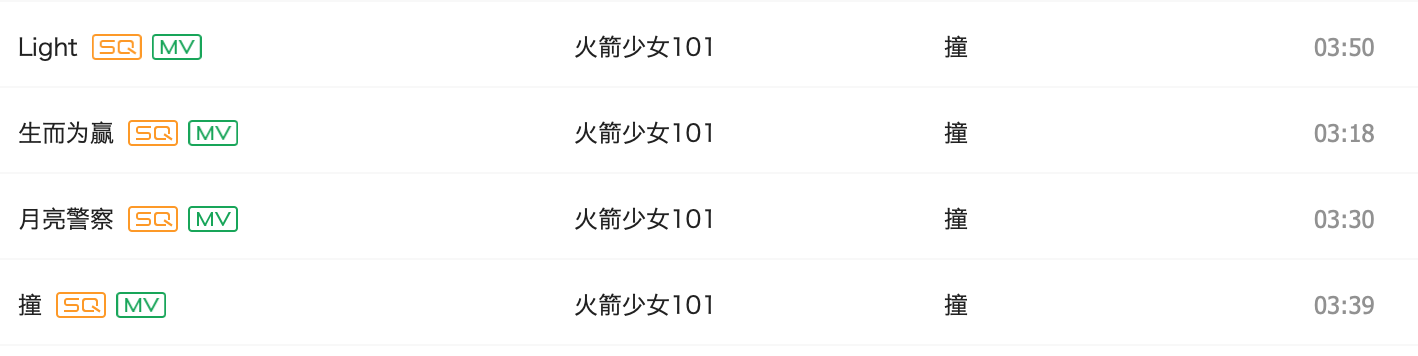

### 2018年
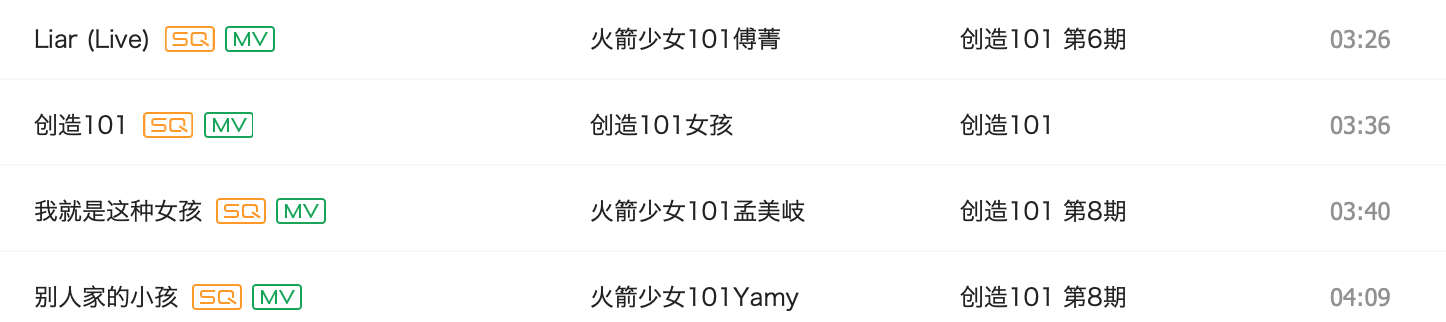

### 信息分析

- 2018年：创造101公演曲目
- 2019年初：火箭少女101发行的新专辑（付费数字专辑，10块钱）
- 2019年中：宇宙少女专辑曲目、IZ*ONE（Produce 48，韩版创造101）专辑曲目

### 用户行为挖掘
- 创造101忠实用户，很有可能购买了腾讯VIP会员（事实情况：创造101提高对腾讯视频的粘性，创后出国购买）
- 愿意为女团的作品及周边付费（事实情况：没有付费购买音乐习惯，提高对QQ音乐的粘性，创后出国购买VIP）
- 从国内团被吸引到国外类似团，可能有消费意愿（事实情况：刚刚入坑）

## 商业数据分析的常见问题


### 用户增长

以腾讯视频为例：
- 通过创造101等节目吸引新用户使用，或者让老用户反复使用腾讯视频形成粘性，或者让老用户因为某个节目推荐新用户使用
- 通过VIP会员等方法获取收入

### 动态定价

- 显性：机票、酒店的价格
- 隐性：腾讯视频VIP会员定价


### 个性化推荐

- 搜索排序：比如百度、淘宝的搜索功能等。
- 社交推荐：比如微信的“看一看”功能。
- 算法推荐：比如淘宝的推荐、QQ音乐的推荐等。

## 用户增长的AARRR模型

### 什么是AARRR模型？

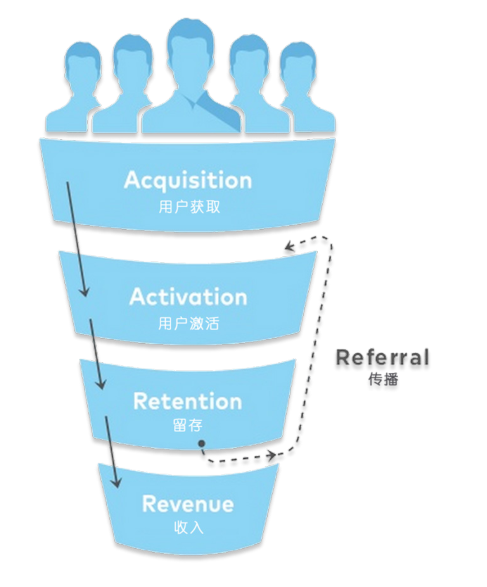

- 获取（Acquisition）：用户如何发现（并来到）你的产品？
- 激活（Activation）：用户的第一次使用体验如何？
- 留存（Retention）：用户是否还会回到产品（重复使用）？
- 收入（Retention）：产品怎样（通过用户）赚钱？
- 传播（Retention）：用户是否愿意告诉其他用户？

### 以创造101为例的用户故事

- 获取：“杨超越又哭了”再次登上热搜，某天刷微博的你刷到了，你决定去“创造101”一探究竟。
- 激活：你按着快进看完了三个小时的最新一集，发现里面有很多长的很符合你审美的小姐姐，你决定继续往下看下去。
- 留存：你成了每周追更新的大军中的一员，并且一期不落地补上了每一集，并且每天给你喜欢的小姐姐投票。
- 收入：你发现11票已经无法满足你，为了pick你最爱的小姐姐，你决定充值腾讯视频VIP会员，每天投票121票。
- 传播：为了你pick的小姐姐可以出道，你疯狂地在朋友圈里安利你pick的小姐姐。

## Python代码实现AARRR模型

步骤：
1. 模拟生成相关的数据表（包括用户基本信息、用户登录记录、交易记录、APP下载记录、用户推荐记录等）
2. 生成AARRR的五个基本数据
3. 可视化结果

### 模拟数据表

### 导入库

In [1]:
# 内建库
import random

# 第三方库
import numpy as np
import pandas as pd


### 用户基本信息

In [2]:
user_data = []

for i in range(1,10001):
    user = 'user%d'%i
    sex = random.choice(['male','female'])
    user_data.append([user,sex])
    
df_user = pd.DataFrame(user_data, columns=['name','sex'])
df_user.head(5)

,name,sex
0,user1,female
1,user2,female
2,user3,male
3,user4,male
4,user5,female


### 用户登录数据

In [3]:
login_count = random.randint(10000,1000000)

login_data = []
for i in range(login_count):
    user = 'user%d'%(random.randint(1,10000))
    time = random.randint(1,1000)
    login_data.append([user,time])
    
df_login = pd.DataFrame(login_data, columns=['user','login_time'])
df_login.head(5)

,user,login_time
0,user4968,5
1,user665,623
2,user2523,10
3,user7966,997
4,user3911,212


### 用户观看创造101的数据

In [4]:
df_101 = df_login.head(random.randint(1000,int(login_count/5)))
df_101.head(5)

,user,login_time
0,user4968,5
1,user665,623
2,user2523,10
3,user7966,997
4,user3911,212


### 用户购买VIP会员的数据

In [5]:
df_vip = df_101.loc[:,['user']].drop_duplicates()
df_vip['is_vip'] = np.random.randint(2,size=len(df_vip))
df_vip = df_vip.loc[df_vip['is_vip']==1,:]
df_vip.head(4)

,user,is_vip
2,user2523,1
3,user7966,1
5,user2936,1
7,user2914,1


### 用户doki发帖数据

In [6]:
df_text = df_login.head(random.randint(100,int(login_count/50)))
df_text.head(5)

,user,login_time
0,user4968,5
1,user665,623
2,user2523,10
3,user7966,997
4,user3911,212


### 统计指标

In [7]:
### 总人数
user_count = len(df_user)
user_count

10000

In [8]:
### 登录人数
login_count = len(df_login['user'].drop_duplicates())
login_count

10000

In [9]:
### 观看101人数
view_count = len(df_101['user'].drop_duplicates())
view_count

9313

In [10]:
### 101深度用户
pick_count = len(df_101.loc[df_101['user'].value_counts().values>1,'user'].drop_duplicates())
pick_count

5274

In [11]:
### VIP会员
vip_count = len(df_vip)
vip_count

4648

In [12]:
### 发帖人数
text_count = len(df_text['user'].drop_duplicates())
text_count

4148

### 可视化

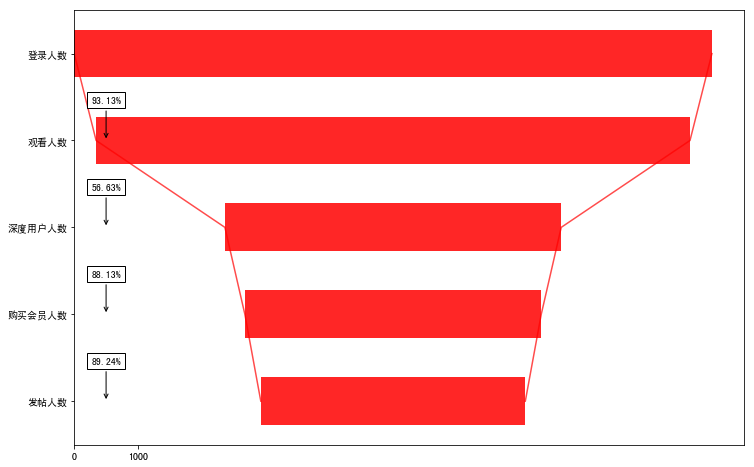

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data

#中文及负号处理
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False

N = 5
width = 0.55
x1 = np.array([login_count, view_count, pick_count, vip_count, text_count])
x2= np.array((x1.max()-x1)/2) # 占位
#x1+x2
x3=[]
for i,j in zip(x1,x2):
    x3.append(i+j)
x3 = np.array(x3)

y = -np.sort(-np.arange(N)) # 倒转y轴
labels=['登录人数','观看人数','深度用户人数','购买会员人数','发帖人数']

#figure
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

#plot
ax.barh(y,x3,width,tick_label=labels,color='r',alpha=0.85)
ax.plot(x3,y,'red',alpha=0.7)
ax.barh(y,x2,width,color='w',alpha =1) #辅助图
ax.plot(x2,y,'red',alpha=0.7)

#setting
transform = []       
for i in range(0,len(x1)):
    if i < len(x1)-1:
        transform.append('%.2f%%'%((x1[i+1]/x1[i])*100))
l = [(500,3),(500,2),(500, 1),(500, 0)]
for a,b in zip(transform,l):
    offsetbox = TextArea(a, minimumdescent=False)
    ab = AnnotationBbox(offsetbox, b,
                        xybox=(0, 40),
                        boxcoords="offset points",
                        arrowprops=dict(arrowstyle="->"))
    ax.add_artist(ab)
ax.set_xticks([0,1000])
ax.set_yticks(y)